In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics

In [2]:
%matplotlib inline

In [3]:
ff1 = pd.read_csv('2019JanFeb/2019-01.csv')
ff2 = pd.read_csv('2019JanFeb/2019-02.csv')

In [4]:
ff1.head()

,timestamp,location,device,probes_global,probes_local,macs_global,macs_local,counts_global,counts_local,adjusted_local,imputed
0,2019-01-01 00:00:00,3,1032,152,127,28,90,17,1,15,f
1,2019-01-01 00:05:00,3,1032,190,118,25,84,16,84,10,f
2,2019-01-01 00:10:00,3,1032,160,67,22,47,8,46,4,f
3,2019-01-01 00:15:00,3,1032,124,36,19,29,8,29,3,f
4,2019-01-01 00:20:00,3,1032,156,119,26,81,12,79,10,f


In [5]:
ff2.head()

,timestamp,location,device,probes_global,probes_local,macs_global,macs_local,counts_global,counts_local,adjusted_local,imputed
0,2019-02-01 00:00:00,3,1032,197,69,30,42,17,4,6,f
1,2019-02-01 00:05:00,3,1032,176,42,22,24,13,24,4,f
2,2019-02-01 00:10:00,3,1032,119,49,27,34,17,34,7,f
3,2019-02-01 00:15:00,3,1032,236,59,25,44,18,43,5,f
4,2019-02-01 00:20:00,3,1032,278,139,32,89,19,88,10,f


In [6]:
print('There are', ff1.location.nunique(), 'retail areas in the footfall data1.')

There are 698 retail areas in the footfall data1.


In [7]:
print('There are', ff2.location.nunique(), 'retail areas in the footfall data2.')

There are 660 retail areas in the footfall data2.


In [8]:
ff12 = ff1.append(ff2)
ff12.head()

,timestamp,location,device,probes_global,probes_local,macs_global,macs_local,counts_global,counts_local,adjusted_local,imputed
0,2019-01-01 00:00:00,3,1032,152,127,28,90,17,1,15,f
1,2019-01-01 00:05:00,3,1032,190,118,25,84,16,84,10,f
2,2019-01-01 00:10:00,3,1032,160,67,22,47,8,46,4,f
3,2019-01-01 00:15:00,3,1032,124,36,19,29,8,29,3,f
4,2019-01-01 00:20:00,3,1032,156,119,26,81,12,79,10,f


In [13]:
ff12_loc3 = ff12[ff12.location <= 3]
ff12_loc3

In [16]:
ff12_loc3['adjusted_local'].describe()

count    16128.000000
mean        22.175967
std         19.335422
min          0.000000
25%          5.000000
50%         19.000000
75%         34.000000
max        160.000000
Name: adjusted_local, dtype: float64

Text(0, 0.5, 'Passenger Count')

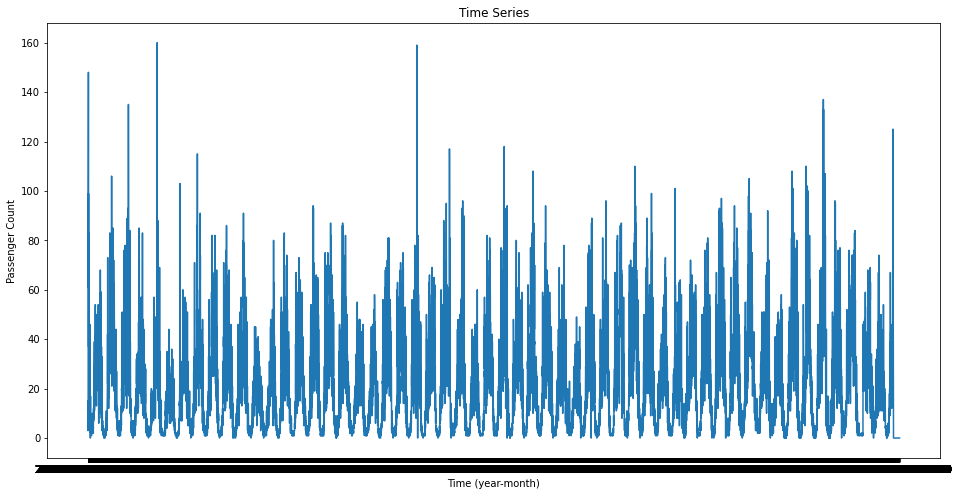

In [19]:
ff12_loc3.index = ff12_loc3['timestamp']
ff12_loc3_plot = ff12_loc3['adjusted_local']
plt.figure(figsize = (16,8))
plt.plot(ff12_loc3_plot)
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("Local Count")

In [3]:
loc3_fri = pd.read_csv('location3_fri.csv')
loc3_fri.head()

,time,location,device,probes_global,probes_local,macs_global,macs_local,counts_global,counts_local,adjusted_local,imputed
0,2019-01-04 00:00:00,3,1032,67,19,15,16,12,3,4,f
1,2019-01-04 00:05:00,3,1032,106,31,19,25,16,25,5,f
2,2019-01-04 00:10:00,3,1032,84,26,24,20,17,20,6,f
3,2019-01-04 00:15:00,3,1032,37,25,11,20,3,20,3,f
4,2019-01-04 00:20:00,3,1032,73,19,16,16,14,16,4,f


Text(0, 0.5, 'Local Count')

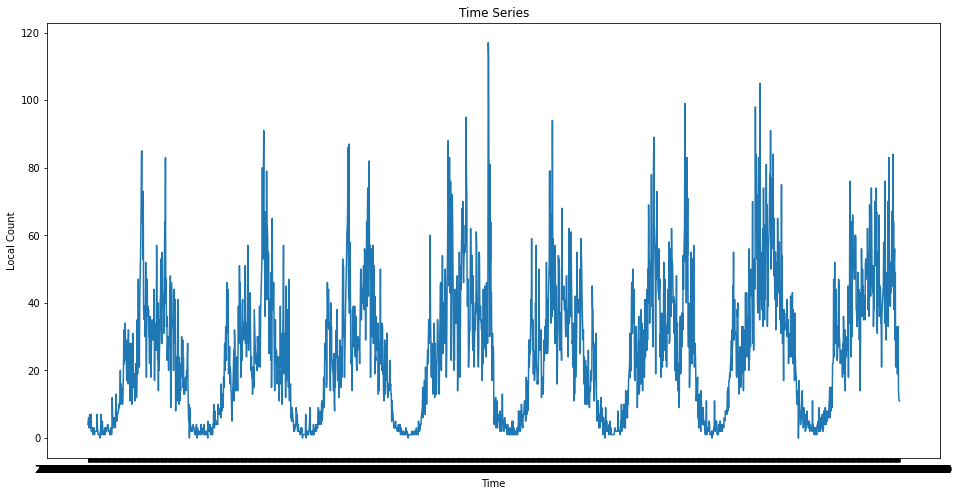

In [24]:
loc3_fri.index = loc3_fri['time']
loc3_fri_plot = loc3_fri['adjusted_local']
plt.figure(figsize = (16,8))
plt.plot(loc3_fri_plot)
plt.title("Time Series")
plt.xlabel("Time")
plt.ylabel("Local Count")

In [4]:
loc3_fri.timestamp = pd.to_datetime(loc3_fri.time, format = '%Y-%m-%d %H:%M:%S')

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [28]:
loc3_fri.head()

,time,location,device,probes_global,probes_local,macs_global,macs_local,counts_global,counts_local,adjusted_local,imputed
time,,,,,,,,,,,
2019-01-04 00:00:00,2019-01-04 00:00:00,3,1032,67,19,15,16,12,3,4,f
2019-01-04 00:05:00,2019-01-04 00:05:00,3,1032,106,31,19,25,16,25,5,f
2019-01-04 00:10:00,2019-01-04 00:10:00,3,1032,84,26,24,20,17,20,6,f
2019-01-04 00:15:00,2019-01-04 00:15:00,3,1032,37,25,11,20,3,20,3,f
2019-01-04 00:20:00,2019-01-04 00:20:00,3,1032,73,19,16,16,14,16,4,f


Text(0, 0.5, 'Local Count')

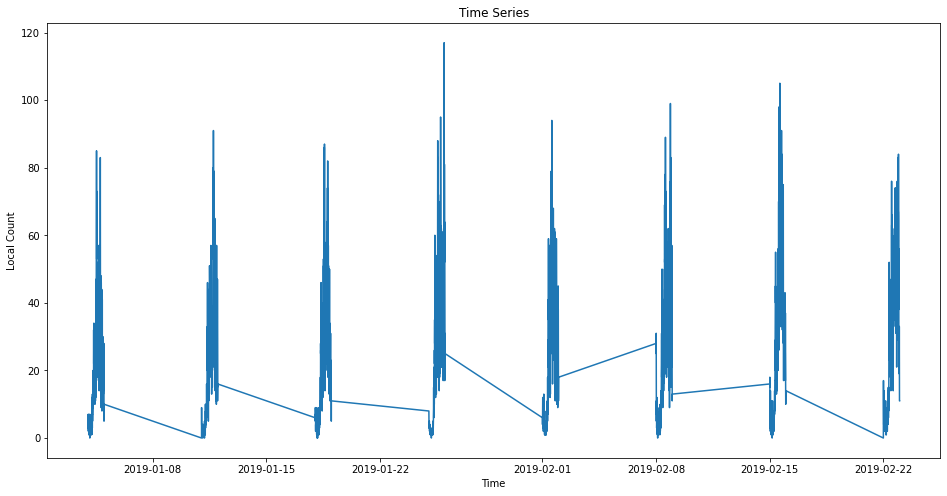

In [5]:
loc3_fri.index = loc3_fri.timestamp
loc3_fri_plot = loc3_fri['adjusted_local']
plt.figure(figsize = (16,8))
plt.plot(loc3_fri_plot)
plt.title("Time Series")
plt.xlabel("Time")
plt.ylabel("Local Count")

In [6]:
#Divide data into training and validation
train = loc3_fri.loc[(loc3_fri.time >= '2019-01-01') & (loc3_fri.time <= '2019-02-21')]
valid = loc3_fri.loc[(loc3_fri.time >= '2019-02-22')& (loc3_fri.time <= '2019-02-23')]

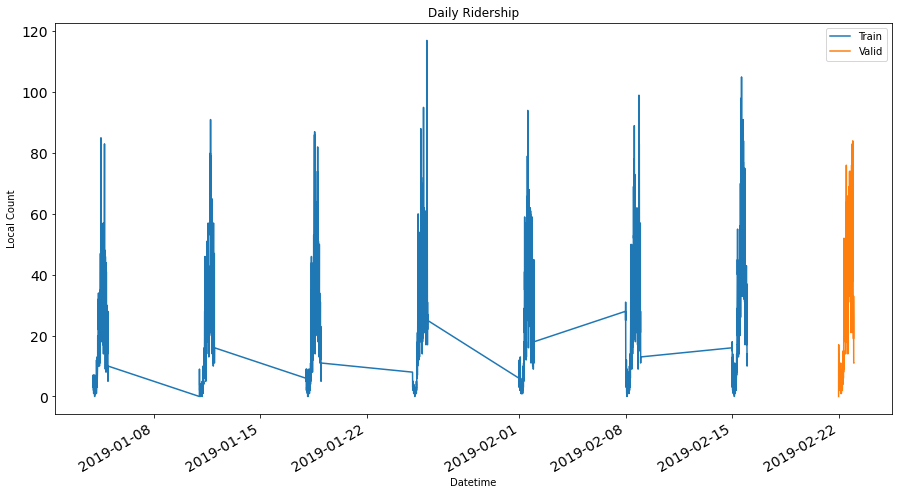

In [54]:
#train.index = train.time
#valid.index = valid.time
train.adjusted_local.plot(figsize = (15,8), title = 'Daily Ridership', fontsize = 14, label = 'Train')
valid.adjusted_local.plot(figsize = (15,8), title = 'Daily Ridership', fontsize =14, label = 'Valid')
plt.xlabel('Datetime')
plt.ylabel('Local Count')
plt.legend(loc = 'best')

In [ ]:
#Weekly Naive Approach (Seasonal)

In [78]:
dd = np.asarray(train.adjusted_local)
y_hat = valid.copy()
y_hat['naive']= dd[len(dd)- 1]
for i in range(len(valid)): 
    y_hat['naive'][i]= dd[len(dd) - len(valid) + i]

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 1.0, 'Naive Forecast')

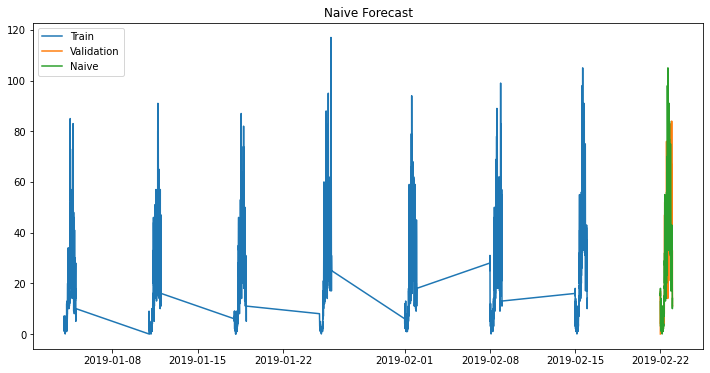

In [87]:
plt.figure(figsize = (12,6))
plt.plot(train.index, train['adjusted_local'],label = 'Train')
plt.plot(valid.index, valid['adjusted_local'], label = 'Validation')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive')
plt.legend(loc = 'best')
plt.title('Naive Forecast')

In [7]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid.adjusted_local, y_hat.naive))
rmse

NameError: name 'y_hat' is not defined

In [ ]:
# average approach

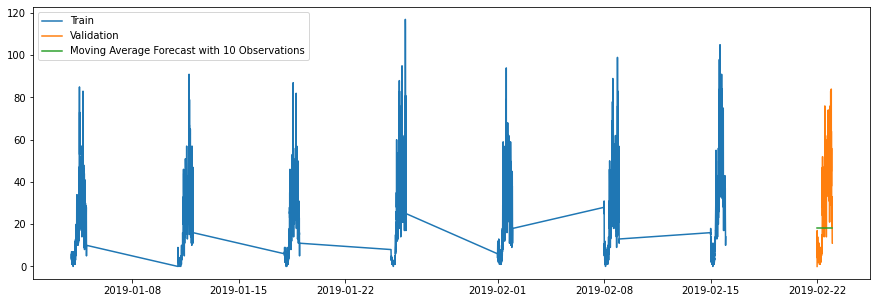

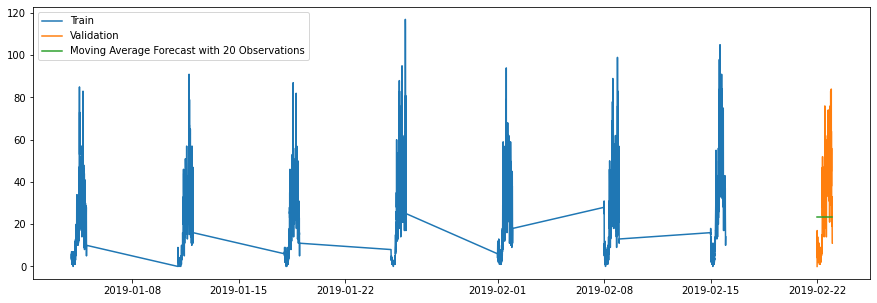

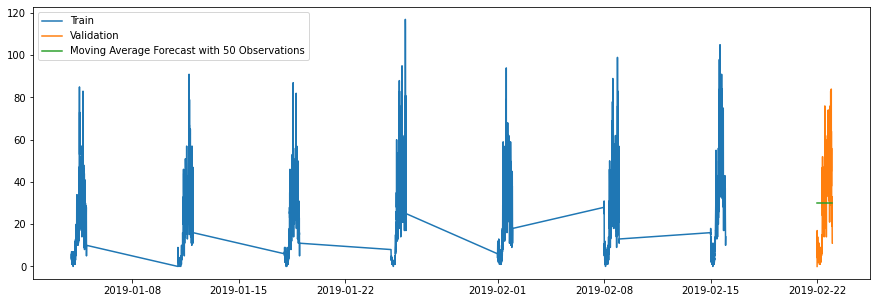

In [94]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = train['adjusted_local'].rolling(10).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['adjusted_local'], label = 'Train')
plt.plot(valid['adjusted_local'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = 'Moving Average Forecast with 10 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = train['adjusted_local'].rolling(20).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['adjusted_local'], label = 'Train')
plt.plot(valid['adjusted_local'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'],label = 'Moving Average Forecast with 20 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast']= train['adjusted_local'].rolling(50).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['adjusted_local'], label = 'Train')
plt.plot(valid['adjusted_local'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()

In [ ]:
# moving average

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


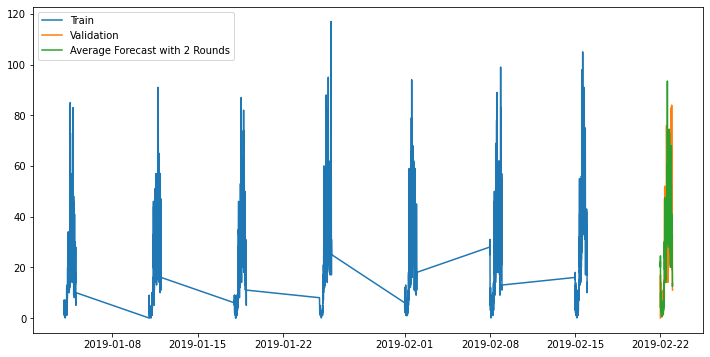

13.253504515577925

In [96]:
y_hat_avg = valid.copy()
y_hat_avg['average_forecast'] = train['adjusted_local'].rolling(10).mean().iloc[-1]
for i in range(len(valid)):
    y_hat_avg['average_forecast'][i] = (train['adjusted_local'][len(train) - len(valid) + i] 
                                        + train['adjusted_local'][len(train) - 2 * len(valid) + i]) / 2
plt.figure(figsize = (12,6))
plt.plot(Train['adjusted_local'], label = 'Train')
plt.plot(valid['adjusted_local'], label = 'Validation')
plt.plot(y_hat_avg['average_forecast'], label = 'Average Forecast with 2 Rounds')
plt.legend(loc = 'best')
plt.show()
rmse = sqrt(mean_squared_error(valid.adjusted_local, y_hat_avg.average_forecast))
rmse

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


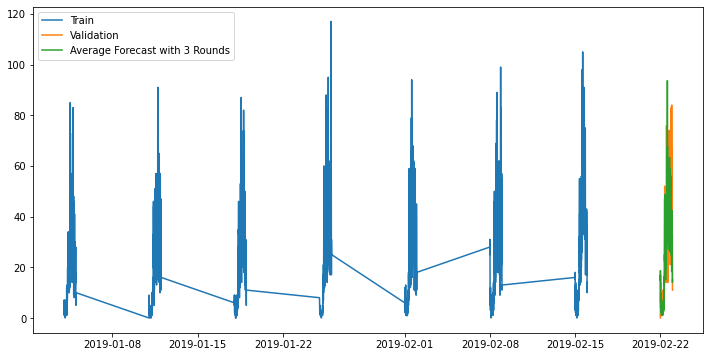

13.265408580771826

In [97]:
y_hat_avg = valid.copy()
y_hat_avg['average_forecast'] = train['adjusted_local'].rolling(10).mean().iloc[-1]
for i in range(len(valid)):
    y_hat_avg['average_forecast'][i] = (train['adjusted_local'][len(train) - len(valid) + i] 
                                        + train['adjusted_local'][len(train) - 2 * len(valid) + i]
                                        + train['adjusted_local'][len(train) - 3 * len(valid) + i]) / 3
plt.figure(figsize = (12,6))
plt.plot(Train['adjusted_local'], label = 'Train')
plt.plot(valid['adjusted_local'], label = 'Validation')
plt.plot(y_hat_avg['average_forecast'], label = 'Average Forecast with 3 Rounds')
plt.legend(loc = 'best')
plt.show()
rmse = sqrt(mean_squared_error(valid.adjusted_local, y_hat_avg.average_forecast))
rmse

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


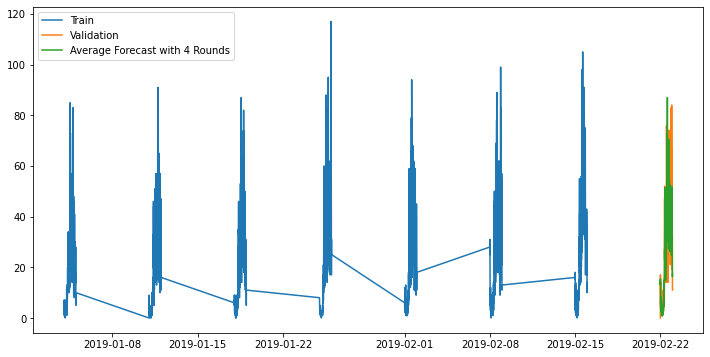

12.441058954794268

In [98]:
y_hat_avg = valid.copy()
y_hat_avg['average_forecast'] = train['adjusted_local'].rolling(10).mean().iloc[-1]
for i in range(len(valid)):
    y_hat_avg['average_forecast'][i] = (train['adjusted_local'][len(train) - len(valid) + i] 
                                        + train['adjusted_local'][len(train) - 2 * len(valid) + i]
                                        + train['adjusted_local'][len(train) - 3 * len(valid) + i]
                                        + train['adjusted_local'][len(train) - 4 * len(valid) + i]) / 4
plt.figure(figsize = (12,6))
plt.plot(Train['adjusted_local'], label = 'Train')
plt.plot(valid['adjusted_local'], label = 'Validation')
plt.plot(y_hat_avg['average_forecast'], label = 'Average Forecast with 4 Rounds')
plt.legend(loc = 'best')
plt.show()
rmse = sqrt(mean_squared_error(valid.adjusted_local, y_hat_avg.average_forecast))
rmse

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


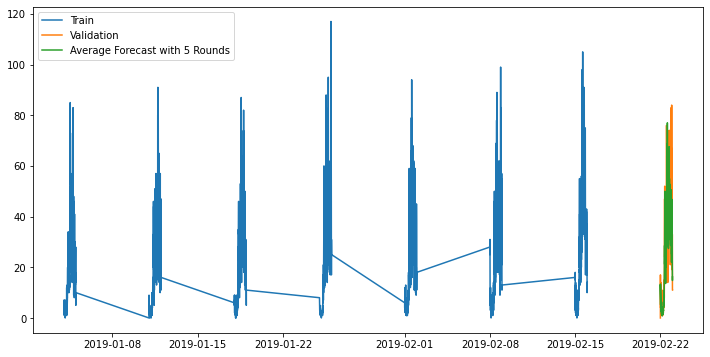

12.31591675660223

In [99]:
y_hat_avg = valid.copy()
y_hat_avg['average_forecast'] = train['adjusted_local'].rolling(10).mean().iloc[-1]
for i in range(len(valid)):
    y_hat_avg['average_forecast'][i] = (train['adjusted_local'][len(train) - len(valid) + i] 
                                        + train['adjusted_local'][len(train) - 2 * len(valid) + i]
                                        + train['adjusted_local'][len(train) - 3 * len(valid) + i]
                                        + train['adjusted_local'][len(train) - 4 * len(valid) + i]
                                        + train['adjusted_local'][len(train) - 5 * len(valid) + i]) / 5
plt.figure(figsize = (12,6))
plt.plot(Train['adjusted_local'], label = 'Train')
plt.plot(valid['adjusted_local'], label = 'Validation')
plt.plot(y_hat_avg['average_forecast'], label = 'Average Forecast with 5 Rounds')
plt.legend(loc = 'best')
plt.show()
rmse = sqrt(mean_squared_error(valid.adjusted_local, y_hat_avg.average_forecast))
rmse

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


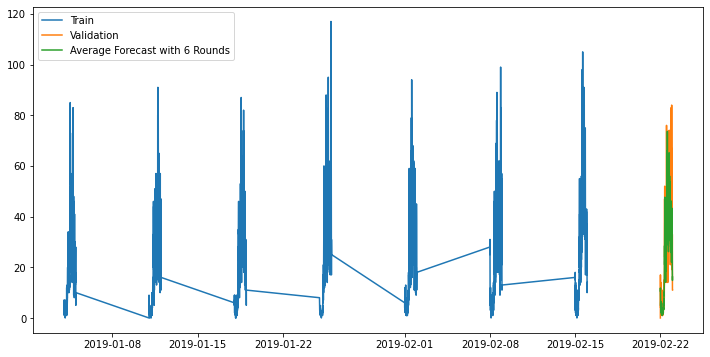

12.415291683750027

In [100]:
y_hat_avg = valid.copy()
y_hat_avg['average_forecast'] = train['adjusted_local'].rolling(10).mean().iloc[-1]
for i in range(len(valid)):
    y_hat_avg['average_forecast'][i] = (train['adjusted_local'][len(train) - len(valid) + i] 
                                        + train['adjusted_local'][len(train) - 2 * len(valid) + i]
                                        + train['adjusted_local'][len(train) - 3 * len(valid) + i]
                                        + train['adjusted_local'][len(train) - 4 * len(valid) + i]
                                        + train['adjusted_local'][len(train) - 5 * len(valid) + i]
                                        + train['adjusted_local'][len(train) - 6 * len(valid) + i]) / 6
plt.figure(figsize = (12,6))
plt.plot(Train['adjusted_local'], label = 'Train')
plt.plot(valid['adjusted_local'], label = 'Validation')
plt.plot(y_hat_avg['average_forecast'], label = 'Average Forecast with 6 Rounds')
plt.legend(loc = 'best')
plt.show()
rmse = sqrt(mean_squared_error(valid.adjusted_local, y_hat_avg.average_forecast))
rmse

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


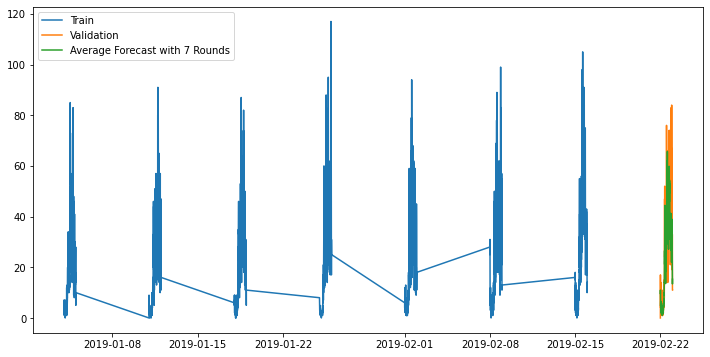

12.439183118034357

In [101]:
y_hat_avg = valid.copy()
y_hat_avg['average_forecast'] = train['adjusted_local'].rolling(10).mean().iloc[-1]
for i in range(len(valid)):
    y_hat_avg['average_forecast'][i] = (train['adjusted_local'][len(train) - len(valid) + i] 
                                        + train['adjusted_local'][len(train) - 2 * len(valid) + i]
                                        + train['adjusted_local'][len(train) - 3 * len(valid) + i]
                                        + train['adjusted_local'][len(train) - 4 * len(valid) + i]
                                        + train['adjusted_local'][len(train) - 5 * len(valid) + i]
                                        + train['adjusted_local'][len(train) - 6 * len(valid) + i]
                                        + train['adjusted_local'][len(train) - 7 * len(valid) + i]) / 7
plt.figure(figsize = (12,6))
plt.plot(train['adjusted_local'], label = 'Train')
plt.plot(valid['adjusted_local'], label = 'Validation')
plt.plot(y_hat_avg['average_forecast'], label = 'Average Forecast with 7 Rounds')
plt.legend(loc = 'best')
plt.show()
rmse = sqrt(mean_squared_error(valid.adjusted_local, y_hat_avg.average_forecast))
rmse

In [102]:
# In summary, Average Forecast with window = 5 has the best result

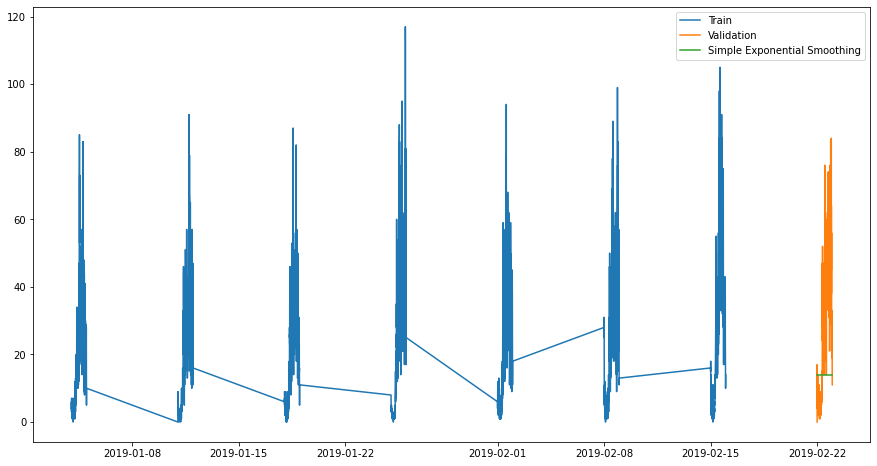

In [11]:
#Simple Exponential Smoothing

from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt

y_hat = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['adjusted_local'])).fit(smoothing_level = 0.6,optimized = False)
y_hat['SES'] = fit2.forecast(len(valid))
plt.figure(figsize =(15,8))
plt.plot(train['adjusted_local'], label = 'Train')
plt.plot(valid['adjusted_local'], label = 'Validation')
plt.plot(y_hat['SES'], label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')

In [12]:
rmse = sqrt(mean_squared_error(valid.adjusted_local, y_hat['SES']))
rmse

25.773960233850218

In [ ]:
#Holt-Winters’seasonal method

E:\Anaconda3\envs\urbsim\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


23.016141034268113

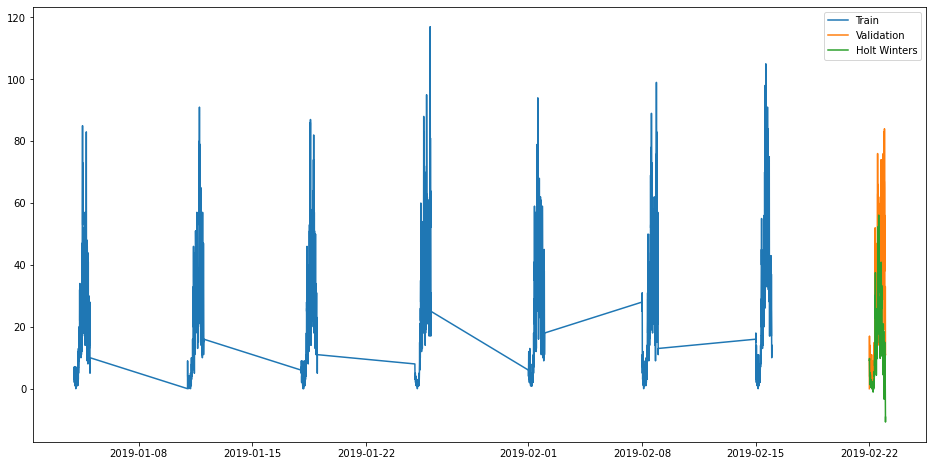

In [19]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(train['adjusted_local']), seasonal_periods= 288, trend = 'add', seasonal= 'add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize = (16,8))
plt.plot(train['adjusted_local'], label = 'Train')
plt.plot(valid['adjusted_local'], label = 'Validation')
plt.plot(y_hat_avg.Holt_Winter, label = 'Holt Winters')
plt.legend(loc = 'best')
rmse = sqrt(mean_squared_error(valid['adjusted_local'], y_hat_avg['Holt_Winter']))
rmse

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #Determine rolling statistics
    rolmean = pd.rolling_mean(timeseries,window = 24)
    rolstd = pd.rolling_std(timeseries, window = 24)
    
    #Plot rolling Statistics
    orig = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False)
    
    #Perform Dickey Fuller test
    print("Results of Dickey Fuller test: ")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '# Lag Used', 'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(20,10)
test_stationary(train_original['Count'])